In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Breast_Cancer.csv')

# Step 1: Data Collection
# Display the first five rows of the dataset
print("First 5 rows of the dataset:")
df.head()  # or df.sample(5) to get a random sample

First 5 rows of the dataset:


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


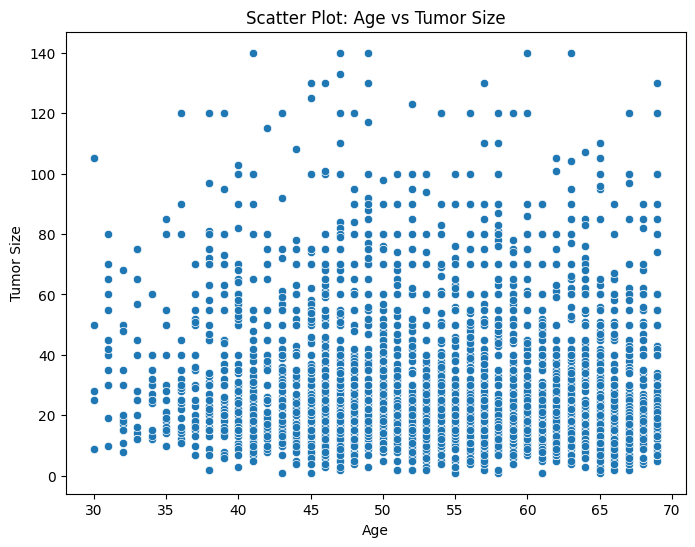

In [ ]:
# Step 2: Data Visualization

# 1. Scatter Plot: Show relationships between numeric variables
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Tumor Size')
plt.title('Scatter Plot: Age vs Tumor Size')
plt.xlabel('Age')
plt.ylabel('Tumor Size')
plt.show()

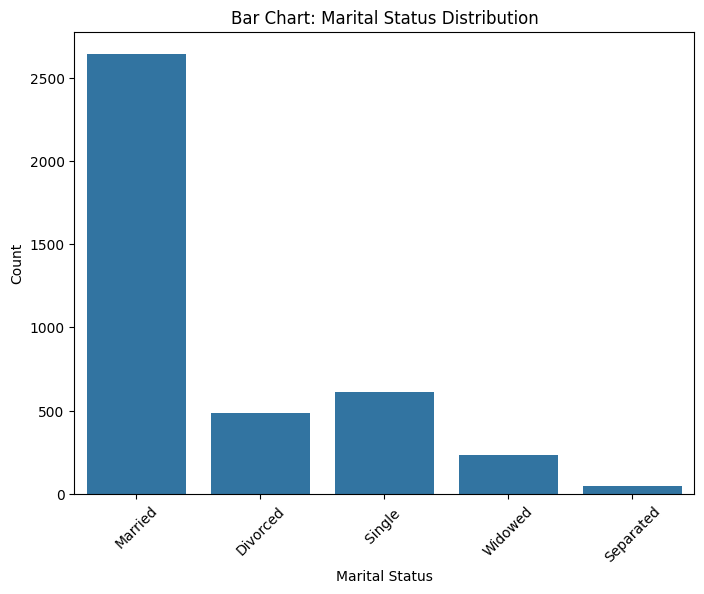

In [ ]:
# 2. Bar Chart: Compare categorical data
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Marital Status')
plt.title('Bar Chart: Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

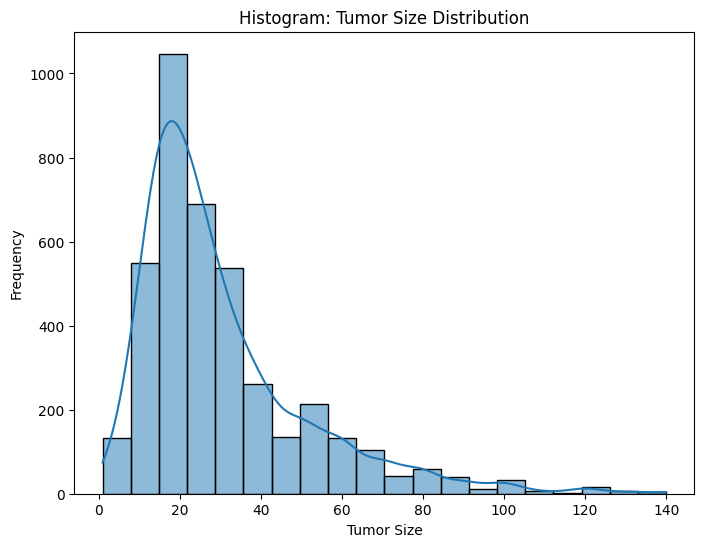

In [ ]:
# 3. Histogram: Display the distribution of numerical data
plt.figure(figsize=(8,6))
sns.histplot(df['Tumor Size'], bins=20, kde=True)
plt.title('Histogram: Tumor Size Distribution')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.show()

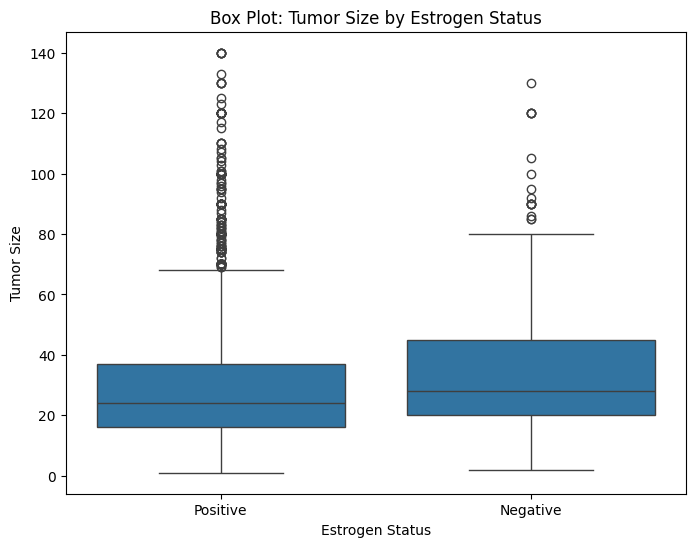

In [ ]:
# 4. Box Plot: Visualize data spread and identify outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Estrogen Status', y='Tumor Size')
plt.title('Box Plot: Tumor Size by Estrogen Status')
plt.xlabel('Estrogen Status')
plt.ylabel('Tumor Size')
plt.show()

In [ ]:
# Step 3: Data Preprocessing

# 1. Handling Missing Values
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Fill missing values with the median (example for numeric columns)
df['Tumor Size'] = df['Tumor Size'].fillna(df['Tumor Size'].median())

# Alternatively, drop rows with missing values
# df.dropna(inplace=True)

# Display the dataset before and after handling missing values
print("Dataset before handling missing values:")
df.head()


Missing values in the dataset:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64
Dataset before handling missing values:


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
# Step 3.2: Outlier Detection and Removal (IQR Method)
# Outlier detection using IQR (Interquartile Range)
Q1 = df['Tumor Size'].quantile(0.25)
Q3 = df['Tumor Size'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Tumor Size'] >= lower_bound) & (df['Tumor Size'] <= upper_bound)]

# Display the dataset before and after removing outliers
print("Dataset before removing outliers:")
print(df['Tumor Size'].describe())  # before
print("Dataset after removing outliers:")
print(df_no_outliers['Tumor Size'].describe())  # after

Dataset before removing outliers:
count    4024.000000
mean       30.473658
std        21.119696
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor Size, dtype: float64
Dataset after removing outliers:
count    3802.000000
mean       26.919253
std        15.062723
min         1.000000
25%        15.000000
50%        23.000000
75%        35.000000
max        70.000000
Name: Tumor Size, dtype: float64


In [ ]:
# Step 3.3: Data Reduction (Dropping less relevant columns)
# Dropping irrelevant columns (example)
df_reduced = df.drop(columns=['Marital Status', 'Race'])

# Display the dataset before and after data reduction
print("Dataset before data reduction:")
df.head()  # before
print("Dataset after data reduction:")
df_reduced.head()  # after


Dataset before data reduction:
Dataset after data reduction:


,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
# Step 3.4: Data Scaling (Min-Max Scaling)
# Apply Min-Max Scaling to 'Tumor Size' column
scaler = MinMaxScaler()
df['Tumor Size Scaled'] = scaler.fit_transform(df[['Tumor Size']])

# Display the dataset before and after scaling
print("Dataset before and after scaling:")
print(df[['Tumor Size', 'Tumor Size Scaled']].head())  # before and after scaling

Dataset before and after scaling:
   Tumor Size  Tumor Size Scaled
0           4           0.021583
1          35           0.244604
2          63           0.446043
3          18           0.122302
4          41           0.287770


In [ ]:
# Step 4: Statistical Analysis

# 1. General Overview of Data
print("General overview of the dataset:")
df.info()  # Provides information on columns, data types, and missing values
print("Statistical summary of the dataset:")
df.describe()  # Statistical summary of the dataset

General overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Surviva

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Tumor Size Scaled
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962,0.212041
std,8.963134,21.119696,8.099675,5.109331,22.921430,0.151940
min,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000,0.107914
50%,54.000000,25.000000,14.000000,2.000000,73.000000,0.172662
75%,61.000000,38.000000,19.000000,5.000000,90.000000,0.266187
max,69.000000,140.000000,61.000000,46.000000,107.000000,1.000000


In [ ]:

# 2. Central Tendency Measures: Min, Max, Mean, Median, Mode
min_val = df['Tumor Size'].min()
max_val = df['Tumor Size'].max()
mean_val = df['Tumor Size'].mean()
median_val = df['Tumor Size'].median()
mode_val = df['Tumor Size'].mode()[0]

print(f'Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}')

Min: 1, Max: 140, Mean: 30.47365805168986, Median: 25.0, Mode: 15


In [ ]:

# 3. Dispersion Measures: Range, IQR, Variance, Standard Deviation
range_val = df['Tumor Size'].max() - df['Tumor Size'].min()
variance = df['Tumor Size'].var()
std_dev = df['Tumor Size'].std()
Q1 = df['Tumor Size'].quantile(0.25)
Q3 = df['Tumor Size'].quantile(0.75)
IQR = Q3 - Q1

print(f'Range: {range_val}, Variance: {variance}, Std Dev: {std_dev}, IQR: {IQR}')


Range: 139, Variance: 446.0415629514194, Std Dev: 21.119696090413314, IQR: 22.0


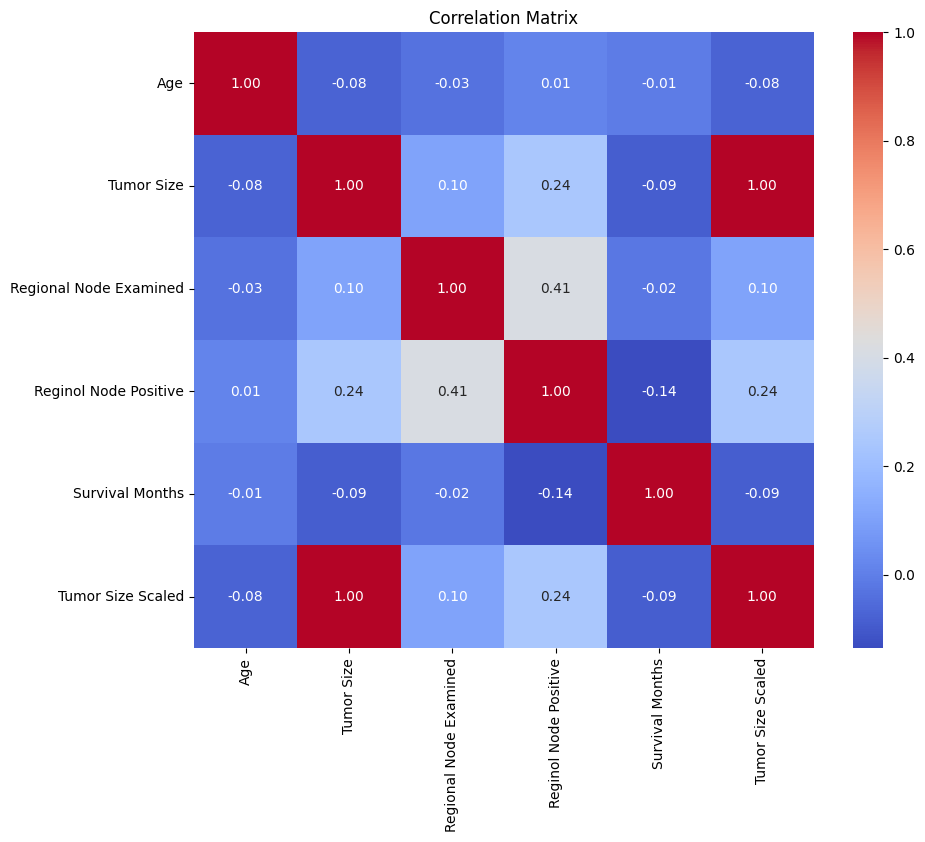

In [ ]:
# 4. Correlation Analysis
# Select only the numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix for numerical columns only
correlation_matrix = df[numerical_cols].corr()

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()